### Import Libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load the csv files

In [3]:
train = pd.read_csv("csv files/backfilled_data.csv")
train

,ID,Policy_Start_Date,Policy_End_Date,Gender,Age,First_Transaction_Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,ID_0040R73,2010-05-14,2011-05-13,Male,30.000000,2010-05-14,1,Saloon,Black,TOYOTA,Lagos,Lagos,Car Classic,0
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79.000000,2010-11-29,1,JEEP,Grey,TOYOTA,Lagos,Lagos,Car Classic,1
2,ID_005QMC3,2010-03-21,2011-03-20,Male,43.000000,2010-03-21,1,Saloon,Red,TOYOTA,Lagos,Lagos,Car Classic,0
3,ID_0079OHW,2010-08-21,2011-08-20,Male,2.000000,2010-08-21,1,Saloon,Black,TOYOTA,Lagos,Lagos,CarSafe,0
4,ID_00BRP63,2010-08-29,2010-12-31,Entity,20.000000,2010-08-29,3,Saloon,Black,TOYOTA,Lagos,Lagos,Muuve,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12074,ID_ZZA1SES,2010-05-25,2011-05-24,Female,30.000000,2010-05-25,1,JEEP,Black,Range Rover,Ibeju/Lekki,Ibeju-Lekki,Car Classic,1
12075,ID_ZZDAC3K,2010-10-03,2011-10-02,Female,59.000000,2010-10-03,1,JEEP,White,TOYOTA,Victoria Island,Lagos,Car Classic,0
12076,ID_ZZIU2XC,2010-10-10,2011-10-08,Male,34.000000,2010-10-10,1,JEEP,White,TOYOTA,Victoria Island,Lagos,CarSafe,0
12077,ID_ZZRQ1NF,2010-02-27,2011-02-26,Male,41.153991,2010-02-27,2,JEEP,White,TOYOTA,Victoria Island,Lagos,CVTP,0


## Analytical Questions

### Claim Approval Rate per Product Name

In [4]:
claim_rate = train.groupby("ProductName")["target"].mean().sort_values(ascending=False) * 100
print("Claim Rate per Product Type (%):")
print(claim_rate)

Claim Rate per Product Type (%):
ProductName
Muuve               69.892473
CVTP                25.586354
Car Plus            21.193416
Motor Cycle         17.391304
Car Classic         16.561295
CarFlex             16.477273
Customized Motor     7.706422
CarSafe              0.370959
Car Vintage          0.000000
Name: target, dtype: float64


### Volume of Policies per Product Name

In [5]:
policy_count = train["ProductName"].value_counts()
policy_count

ProductName
Car Classic         6485
CarSafe             3774
Customized Motor     545
Car Plus             486
CVTP                 469
CarFlex              176
Muuve                 93
Motor Cycle           46
Car Vintage            5
Name: count, dtype: int64

### Number of Claims Submitted Within 3 Months

In [6]:
claims_by_product = train[train["target"] == 1]["ProductName"].value_counts()
print("\nTotal Claims per Product Type:")
print(claims_by_product)


Total Claims per Product Type:
ProductName
Car Classic         1074
CVTP                 120
Car Plus             103
Muuve                 65
Customized Motor      42
CarFlex               29
CarSafe               14
Motor Cycle            8
Name: count, dtype: int64


### No claims Within 3 Months

In [7]:
non_claims_by_product = train[train["target"] == 0]["ProductName"].value_counts()
print("\nTotal Non-Claims per Product Type:")
print(non_claims_by_product)


Total Non-Claims per Product Type:
ProductName
Car Classic         5411
CarSafe             3760
Customized Motor     503
Car Plus             383
CVTP                 349
CarFlex              147
Motor Cycle           38
Muuve                 28
Car Vintage            5
Name: count, dtype: int64


### Summary

In [8]:
summary = pd.DataFrame({
    "Total Policies": train["ProductName"].value_counts(),
    "Total Claims": train[train["target"] == 1]["ProductName"].value_counts(),
    "No Claims": train[train["target"] == 0]["ProductName"].value_counts(),
    "Claim Rate (%)": train.groupby("ProductName")["target"].mean() * 100
}).sort_values(by="Claim Rate (%)", ascending=False)

print("\nSummary Table per Product Type:")
summary


Summary Table per Product Type:


,Total Policies,Total Claims,No Claims,Claim Rate (%)
ProductName,,,,
Muuve,93,65.0,28,69.892473
CVTP,469,120.0,349,25.586354
Car Plus,486,103.0,383,21.193416
Motor Cycle,46,8.0,38,17.391304
Car Classic,6485,1074.0,5411,16.561295
CarFlex,176,29.0,147,16.477273
Customized Motor,545,42.0,503,7.706422
CarSafe,3774,14.0,3760,0.370959
Car Vintage,5,NaN,5,0.000000


### Number of Policies by Car Color

In [10]:
colour = pd.DataFrame(train["Subject_Car_Colour"].value_counts())
colour

,count
Subject_Car_Colour,
Black,4358
Silver,1296
As Attached,1221
Grey,1205
Blue,895
White,670
Red,612
Green,526
Gold,406


### Number of Policies by Car Make

In [11]:
popular_car_make = pd.DataFrame (train["Subject_Car_Make"].value_counts())
popular_car_make

,count
Subject_Car_Make,
TOYOTA,6298
Honda,1321
Lexus,757
Mercedes,659
Hyundai,584
...,...
Howo,1
Motorcycle,1
REXTON,1


### Number of Policies by Car Category

In [12]:
car_category = pd.DataFrame(train["Car_Category"].value_counts())
car_category

,count
Car_Category,
Saloon,8709
JEEP,2959
Truck,136
Bus,82
Mini Bus,56
Pick Up,41
Motorcycle,22
Sedan,20
Wagon,17


### The number of policies started each year

In [13]:
train["Policy_Start_Date"] = pd.to_datetime(train["Policy_Start_Date"])

train["Policy_Start_Date"] = train["Policy_Start_Date"].dt.year

yearly_volume = train["Policy_Start_Date"].value_counts().sort_index()

print("Yearly Policy Start Volume:")
print(yearly_volume)


Yearly Policy Start Volume:
Policy_Start_Date
2001        1
2002        1
2003        2
2005        1
2006        2
2007        1
2009        6
2010    12065
Name: count, dtype: int64


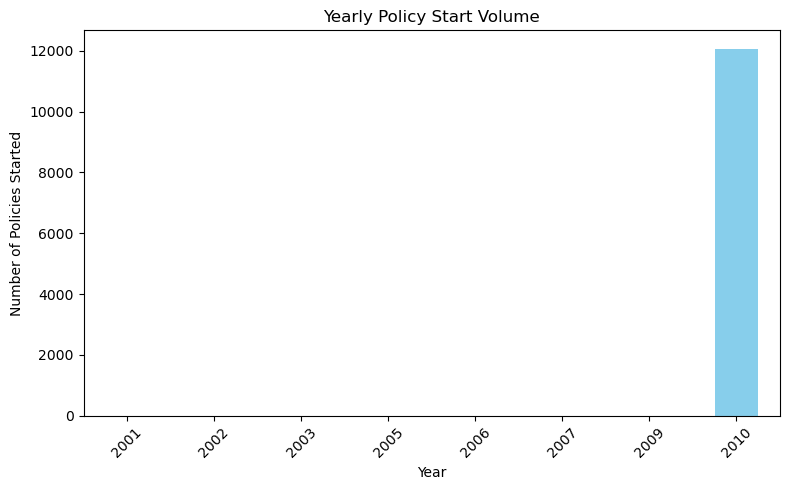

In [14]:
import matplotlib.pyplot as plt

yearly_volume.plot(kind='bar', figsize=(8,5), color='skyblue')
plt.title("Yearly Policy Start Volume")
plt.xlabel("Year")
plt.ylabel("Number of Policies Started")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
train["Policy_End_Date"] = pd.to_datetime(train["Policy_End_Date"])

train["Policy_End_Date"] = train["Policy_End_Date"].dt.year

yearly_volume = train["Policy_End_Date"].value_counts().sort_index()

print(yearly_volume)

Policy_End_Date
2010      169
2011    11902
2012        2
2016        2
2034        1
2037        1
2041        2
Name: count, dtype: int64


In [16]:
train["First_Transaction_Date"] = pd.to_datetime(train["First_Transaction_Date"])

train["First_Transaction_Date"] = train["First_Transaction_Date"].dt.year

yearly_volume = train["First_Transaction_Date"].value_counts().sort_index()

print(yearly_volume)

First_Transaction_Date
2001        1
2002        1
2003        2
2005        1
2006        2
2007        1
2009        6
2010    12065
Name: count, dtype: int64


### Focus year: 2010 is the main data year

In [17]:
train_2010 = train[train["Policy_Start_Date"] == 2010]
train_2010

,ID,Policy_Start_Date,Policy_End_Date,Gender,Age,First_Transaction_Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,ID_0040R73,2010,2011,Male,30.000000,2010,1,Saloon,Black,TOYOTA,Lagos,Lagos,Car Classic,0
1,ID_0046BNK,2010,2011,Female,79.000000,2010,1,JEEP,Grey,TOYOTA,Lagos,Lagos,Car Classic,1
2,ID_005QMC3,2010,2011,Male,43.000000,2010,1,Saloon,Red,TOYOTA,Lagos,Lagos,Car Classic,0
3,ID_0079OHW,2010,2011,Male,2.000000,2010,1,Saloon,Black,TOYOTA,Lagos,Lagos,CarSafe,0
4,ID_00BRP63,2010,2010,Entity,20.000000,2010,3,Saloon,Black,TOYOTA,Lagos,Lagos,Muuve,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12074,ID_ZZA1SES,2010,2011,Female,30.000000,2010,1,JEEP,Black,Range Rover,Ibeju/Lekki,Ibeju-Lekki,Car Classic,1
12075,ID_ZZDAC3K,2010,2011,Female,59.000000,2010,1,JEEP,White,TOYOTA,Victoria Island,Lagos,Car Classic,0
12076,ID_ZZIU2XC,2010,2011,Male,34.000000,2010,1,JEEP,White,TOYOTA,Victoria Island,Lagos,CarSafe,0
12077,ID_ZZRQ1NF,2010,2011,Male,41.153991,2010,2,JEEP,White,TOYOTA,Victoria Island,Lagos,CVTP,0


### Popular Product Name(Insurance Policy)

In [18]:
product_name_counts = train_2010["ProductName"].value_counts()
print("Policy Count by Product Type in 2010:")
print(product_name_counts)

Policy Count by Product Type in 2010:
ProductName
Car Classic         6480
CarSafe             3771
Customized Motor     545
Car Plus             486
CVTP                 467
CarFlex              176
Muuve                 93
Motor Cycle           46
Car Vintage            1
Name: count, dtype: int64


In [19]:
product_name_counts = train_2010["ProductName"].value_counts()
print("Policy Count by Product Type in 2010:")
print(product_name_counts)

cars_by_product = train_2010.groupby("ProductName")["Subject_Car_Make"].unique().reset_index()

cars_by_product.columns = ["ProductName", "Car_Makes_Insured"]

print("\nCar Makes Insured Under Each Product Type in 2010:")
print(cars_by_product)


Policy Count by Product Type in 2010:
ProductName
Car Classic         6480
CarSafe             3771
Customized Motor     545
Car Plus             486
CVTP                 467
CarFlex              176
Muuve                 93
Motor Cycle           46
Car Vintage            1
Name: count, dtype: int64

Car Makes Insured Under Each Product Type in 2010:
        ProductName                                  Car_Makes_Insured
0              CVTP  [TOYOTA, Iveco, DAF, Mitsubishi, Scania, Lexus...
1       Car Classic  [TOYOTA, REXTON, Lexus, Hyundai, Honda, Merced...
2          Car Plus  [Lexus, Mercedes, TOYOTA, Honda, Nissan, BMW, ...
3       Car Vintage                                           [TOYOTA]
4           CarFlex  [TOYOTA, Kia, Honda, Lexus, BMW, Range Rover, ...
5           CarSafe  [TOYOTA, Lexus, Honda, ACURA, Volkswagen, Merc...
6  Customized Motor  [Lexus, Pontiac, TOYOTA, Hyundai, BMW, Ford, H...
7       Motor Cycle  [Jincheng, TOYOTA, Honda, Lexus, Motorcycle, K...
8       

### Most Insured Vehicle Makes


In [20]:
top_makes = train_2010["Subject_Car_Make"].value_counts().head(10)
print("Top 10 Vehicle Makes:")
print(top_makes)

Top 10 Vehicle Makes:
Subject_Car_Make
TOYOTA        6288
Honda         1320
Lexus          757
Mercedes       659
Hyundai        584
Kia            421
Ford           355
Nissan         319
Iveco          153
Volkswagen     150
Name: count, dtype: int64


### **Customers with more than one policy**

### How come 1 customer have 10 policies under 1 insurance policy?
### The person might own a fleet of vehicles for a company (e.g., taxi company, delivery service).
### The gender is Entity referring to a company or organization

In [21]:
customers_with_multiple_policies = train[train['No_Pol'] == 10]

customers_with_multiple_policies = customers_with_multiple_policies.reset_index().rename(columns={'index': 'Customer_ID'})

result = customers_with_multiple_policies[['ID', 'Gender', 'No_Pol', 'Car_Category', 'Subject_Car_Make', 'Policy_Start_Date', 'Policy_End_Date', 'Age', 'ProductName']]

result.head(10)


,ID,Gender,No_Pol,Car_Category,Subject_Car_Make,Policy_Start_Date,Policy_End_Date,Age,ProductName
0,ID_45EY454,Entity,10,JEEP,Isuzu,2010,2011,30.0,CVTP
1,ID_6T6EYUD,Entity,10,Saloon,Mitsubishi,2010,2011,30.0,CarSafe
2,ID_CMJ0C4D,Entity,10,Motorcycle,TOYOTA,2010,2011,30.0,Motor Cycle
3,ID_KGZGAIN,Entity,10,Saloon,TOYOTA,2010,2011,30.0,CVTP
4,ID_NGHH9VO,Entity,10,Saloon,TOYOTA,2010,2011,30.0,CVTP
5,ID_P4I2FTY,Entity,10,Saloon,Nissan,2010,2011,30.0,CarSafe
6,ID_RIAUAX3,Entity,10,Saloon,TOYOTA,2010,2011,30.0,Muuve
7,ID_SI1RIFV,Entity,10,Saloon,Isuzu,2010,2011,30.0,CVTP
8,ID_VKZD12C,Entity,10,Saloon,Ford,2010,2011,30.0,CVTP


In [22]:
customers_with_multiple_policies = train[train['Gender'] == 'Joint Gender']

customers_with_multiple_policies = customers_with_multiple_policies.reset_index().rename(columns={'index': 'Customer_ID'})

result = customers_with_multiple_policies[['ID', 'Gender', 'No_Pol', 'Car_Category', 'Subject_Car_Make', 'Policy_Start_Date', 'Policy_End_Date', 'Age', 'ProductName']]

result.head(50)

,ID,Gender,No_Pol,Car_Category,Subject_Car_Make,Policy_Start_Date,Policy_End_Date,Age,ProductName
0,ID_02O5FDM,Joint Gender,1,Saloon,TOYOTA,2010,2011,20.0,Car Classic
1,ID_076DFB7,Joint Gender,1,Saloon,Hyundai,2010,2011,1.0,CarSafe
2,ID_0ESTG4D,Joint Gender,1,Saloon,TOYOTA,2010,2011,35.0,CarSafe
3,ID_0YVNPAI,Joint Gender,1,Saloon,Honda,2010,2010,44.0,Car Classic
4,ID_187AKRK,Joint Gender,1,JEEP,TOYOTA,2010,2011,33.0,Car Classic
5,ID_1BTPW2R,Joint Gender,2,Saloon,TOYOTA,2010,2011,56.0,CarSafe
6,ID_1YLT3GP,Joint Gender,1,JEEP,Honda,2010,2011,45.0,CarSafe
7,ID_20GFWO2,Joint Gender,1,Saloon,Honda,2010,2010,44.0,Car Classic
8,ID_21EJ8JM,Joint Gender,2,Saloon,Kia,2010,2011,20.0,Customized Motor
9,ID_22OTNSM,Joint Gender,1,Saloon,TOYOTA,2010,2011,38.0,Car Classic


### Age Analysis Distribution and Relation to ProductName

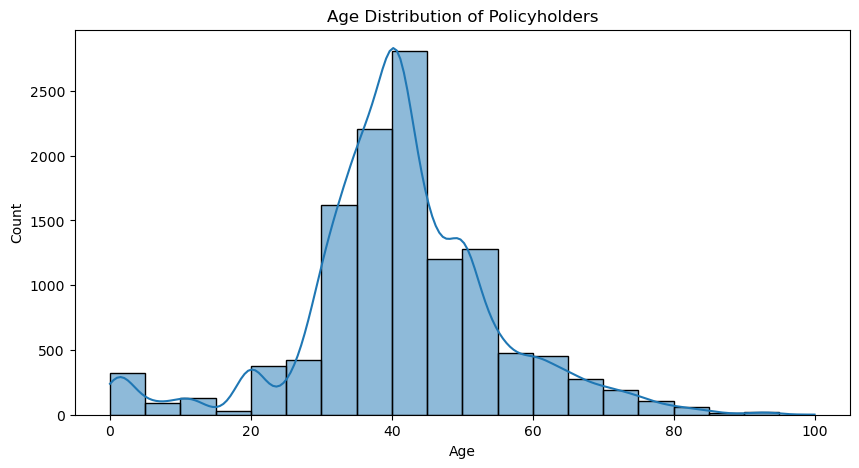


Product Preference by Age Group:
ProductName  CVTP  Car Classic  Car Plus  Car Vintage  CarFlex  CarSafe  \
AgeGroup                                                                  
<25           133          324        23            0        0      345   
25-35          42         1565       159            0       49      577   
35-45         179         2680       195            0       88     1562   
45-55          65         1001        59            0       24      926   
55+            48          908        50            1       15      360   

ProductName  Customized Motor  Motor Cycle  Muuve  
AgeGroup                                           
<25                       116           14     32  
25-35                      15           13      1  
35-45                     159           17     58  
45-55                     179            1      0  
55+                        76            1      2  


/var/folders/pl/nw9j1mq920978rdfc418s8fm0000gn/T/ipykernel_98911/463378172.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_2010['AgeGroup'] = pd.cut(train_2010['Age'], bins=[0, 25, 35, 45, 55, 100],
/var/folders/pl/nw9j1mq920978rdfc418s8fm0000gn/T/ipykernel_98911/463378172.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_product = train_2010.groupby(['AgeGroup', 'ProductName']).size().unstack().fillna(0)


In [23]:
plt.figure(figsize=(10, 5))
sns.histplot(train_2010['Age'], kde=True, bins=20)
plt.title('Age Distribution of Policyholders')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

train_2010['AgeGroup'] = pd.cut(train_2010['Age'], bins=[0, 25, 35, 45, 55, 100], 
                           labels=['<25', '25-35', '35-45', '45-55', '55+'])

age_product = train_2010.groupby(['AgeGroup', 'ProductName']).size().unstack().fillna(0)
print("\nProduct Preference by Age Group:")
print(age_product)


### Geographic Analysis

**Insights You Can Provide
Which states or LGAs should AutoInland target for marketing?

Are there risk-prone areas where claim rates are higher?

Which products are doing well in certain regions?

In [24]:
state_counts = train_2010['State'].value_counts()
print("Top 10 States by Policy Count:\n", state_counts.head(10))

Top 10 States by Policy Count:
 State
Lagos              6793
Benue              1377
Abuja-Municipal     505
Eti-Osa             481
Ibeju-Lekki         246
Ogun                208
Oshodi-Isolo        195
Obia-Akpor          195
Delta               179
Abuja               155
Name: count, dtype: int64


In [25]:
lga_counts = train_2010['LGA_Name'].value_counts()
print("Top 10 LGAs by Policy Count:\n", lga_counts.head(10))

Top 10 LGAs by Policy Count:
 LGA_Name
Victoria Island    2485
Ikeja               811
Surulere            628
Abuja Municipal     501
Lagos Mainland      499
Eti-Osa             481
Lagos Island        474
Lekki               421
Lagos               363
Ibeju/Lekki         246
Name: count, dtype: int64


### Most Popular Product Name in Each State

In [ ]:
product_counts = train_2010.groupby(['State', 'ProductName']).size().reset_index(name='Count')

top_products_by_state = product_counts.sort_values('Count', ascending=False).drop_duplicates(subset=['State'])

print("Most Popular Product per State:\n", top_products_by_state)


Most Popular Product per State:
                State  ProductName  Count
206            Lagos  Car Classic   3521
67             Benue  Car Classic    836
20   Abuja-Municipal  Car Classic    267
113          Eti-Osa  Car Classic    254
136      Ibeju-Lekki  Car Classic    144
..               ...          ...    ...
260    Onitsha-South  Car Classic      1
91       ENUGU-SOUTH  Car Classic      1
93            Ebonyi  Car Classic      1
110      Essien-Udim     Car Plus      1
111     Ethiope-East  Car Classic      1

[111 rows x 3 columns]
